In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
x = np.linspace(-1,1,100)
y = 1.*x
x,y = np.meshgrid(x,y)
u0 = np.zeros_like(x)
nt = 10000
u1 = np.zeros((nt,x.shape[0],x.shape[1]))

In [14]:
h = np.diff(x)[0,0]
cfl = 0.25
dt = cfl*h*h

In [15]:
u1[0,0,:] = 1
u1[0,-1,:] = 0
u1[0,:,0] = (1-(y[:,0]+1)/2)**3
u1[0,:,-1] = (1-(y[:,0]+1)/2)**3

In [16]:
for i in range(nt-1):
    u1[i+1,0,:] = 1
    u1[i+1,-1,:] = 0
    u1[i+1,:,0] = (1-(y[:,0]+1)/2)**3
    u1[i+1,:,-1] = (1-(y[:,0]+1)/2)**3
    u1[i+1,1:-1,1:-1] = u1[i,1:-1,1:-1] + \
            dt/h**2*(u1[i,2:,1:-1]+u1[i,:-2,1:-1]+u1[i,1:-1,2:]+u1[i,1:-1,:-2]-4*u1[i,1:-1,1:-1])

<matplotlib.colorbar.Colorbar instance at 0x7f5c62e89878>

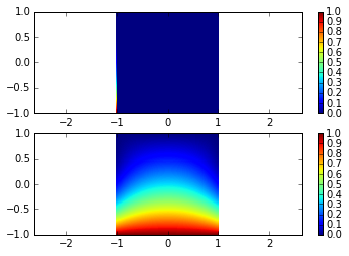

In [17]:
plt.subplot(211)
plt.pcolormesh(x,y,u1[0,:,:])
plt.axis('equal')
plt.colorbar()
plt.subplot(212)
plt.pcolormesh(x,y,u1[nt-1,:,:])
plt.axis('equal')
plt.colorbar()


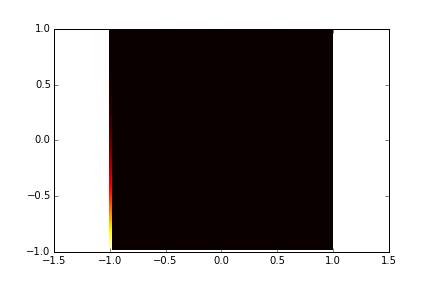
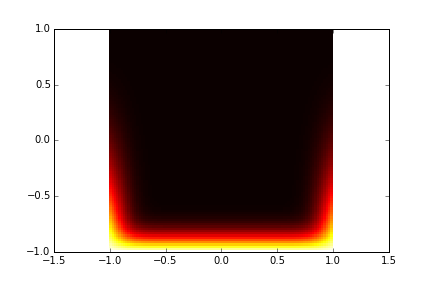
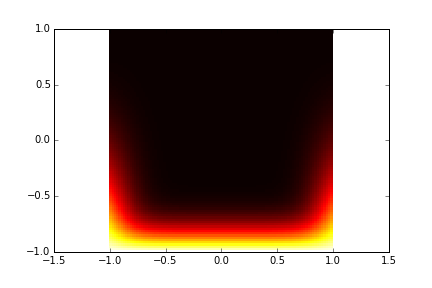
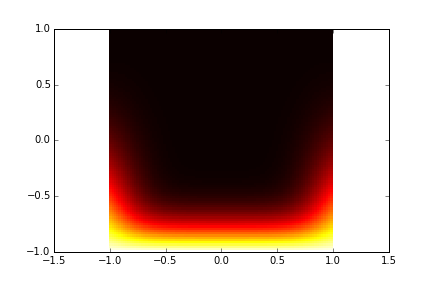
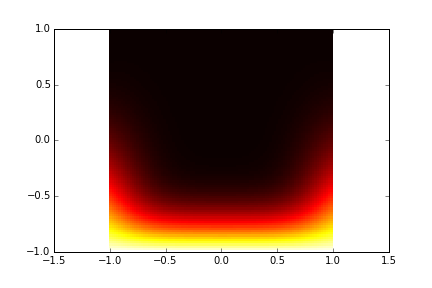
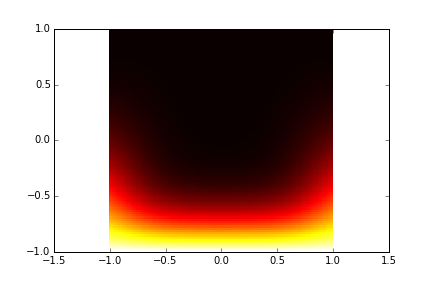
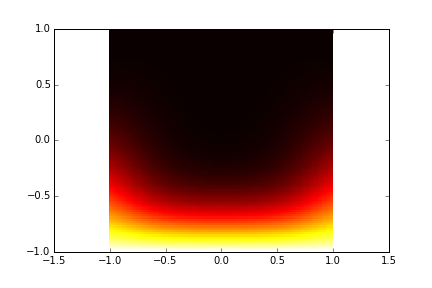
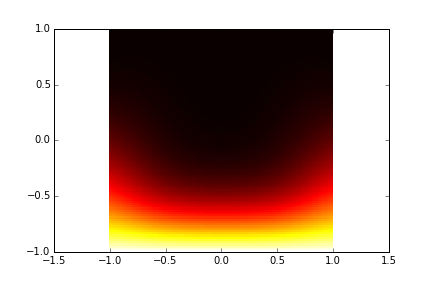
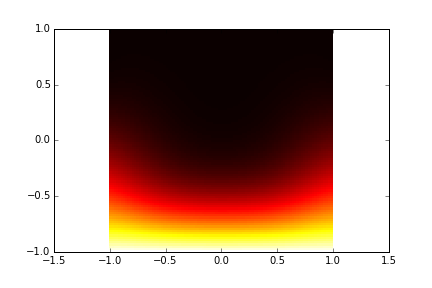
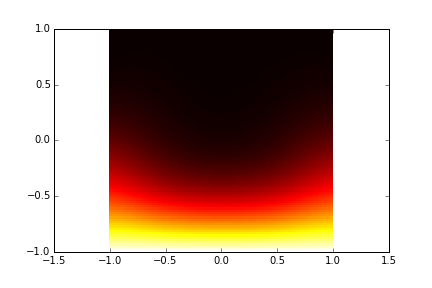
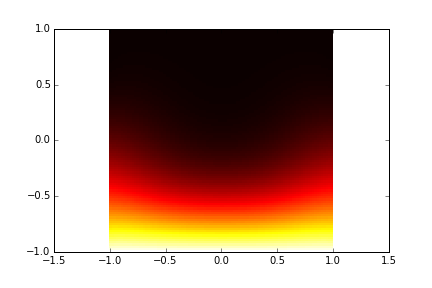
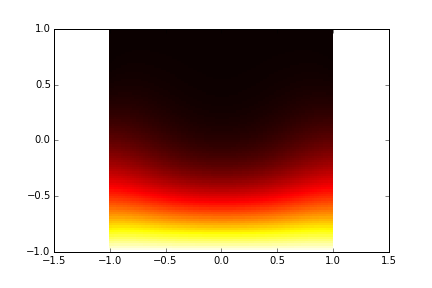
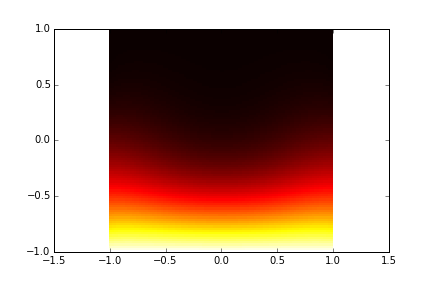
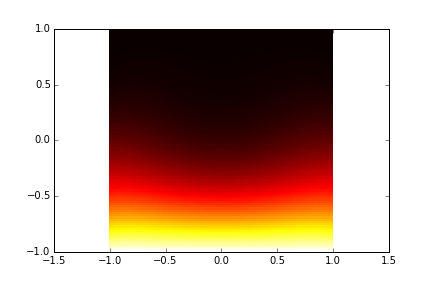
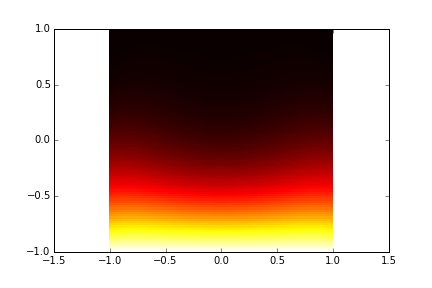
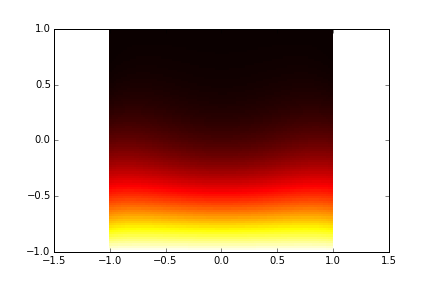
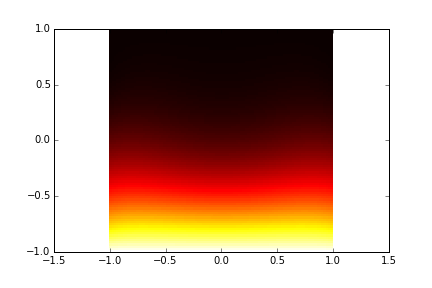
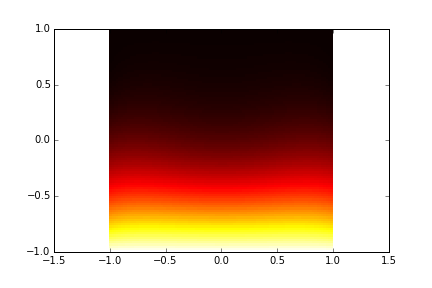
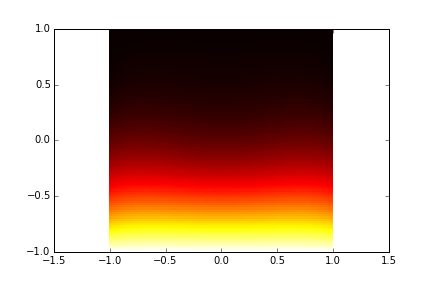
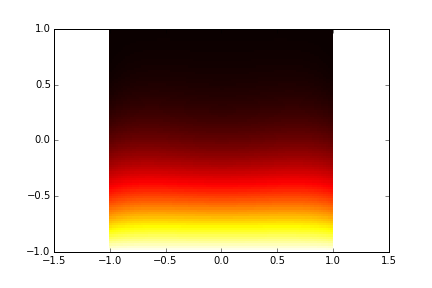
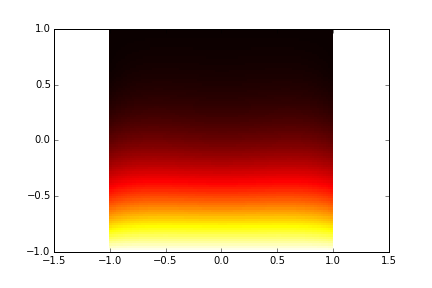
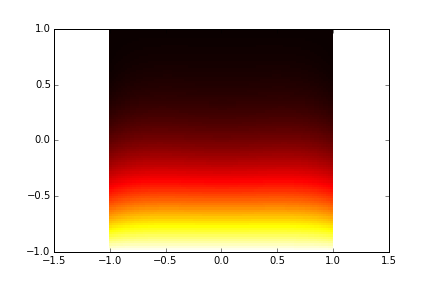
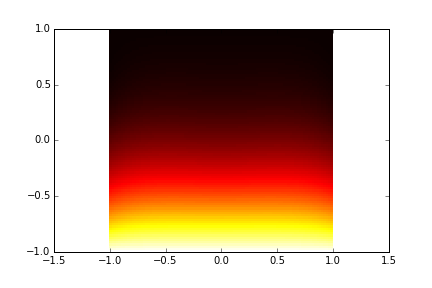
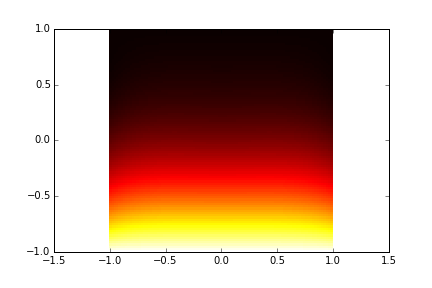
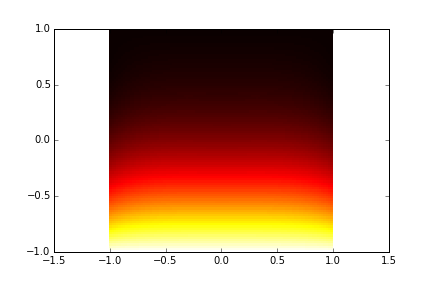
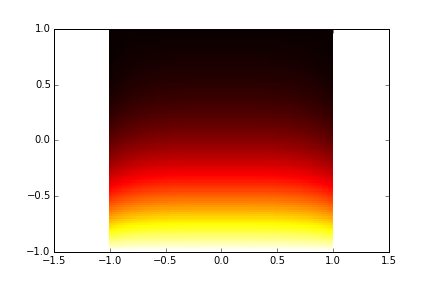
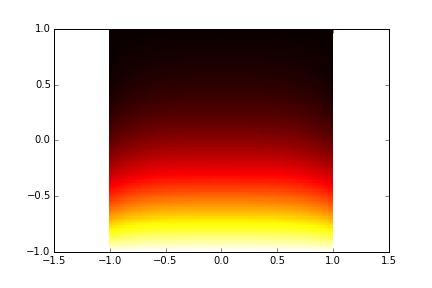
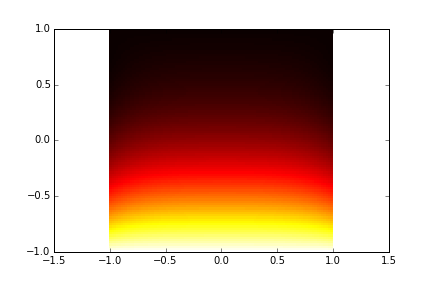
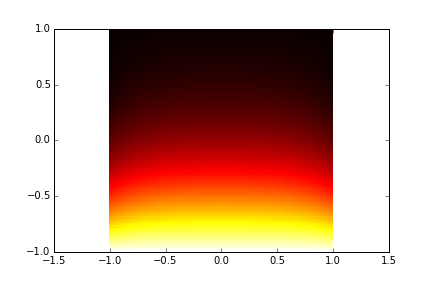
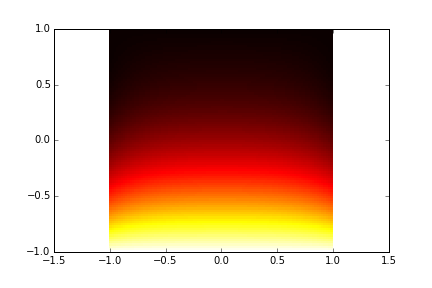
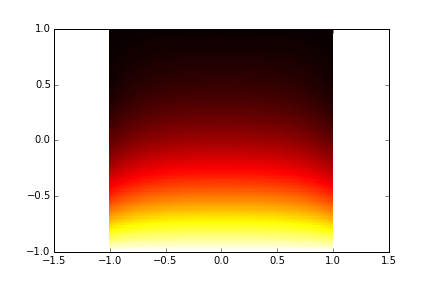
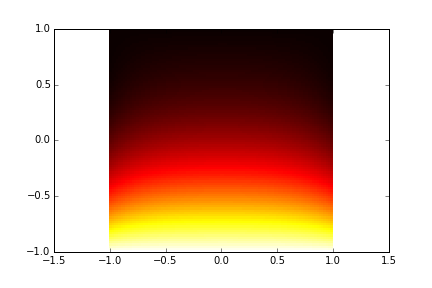
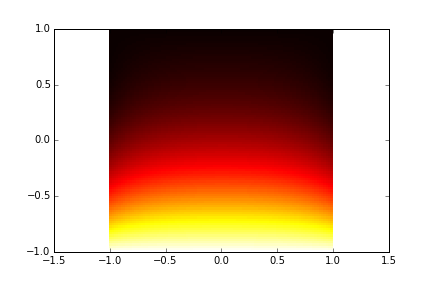
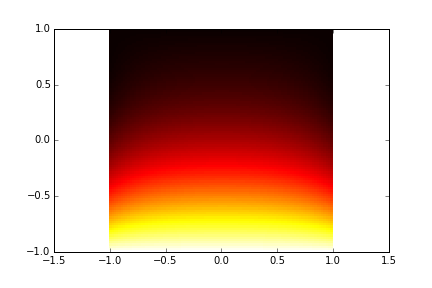
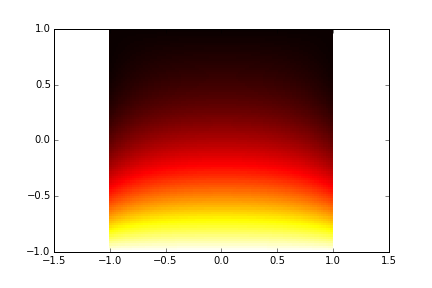
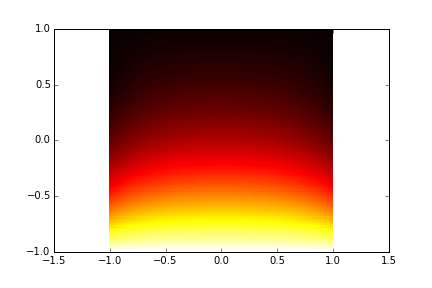
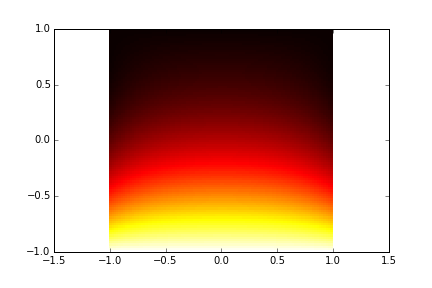
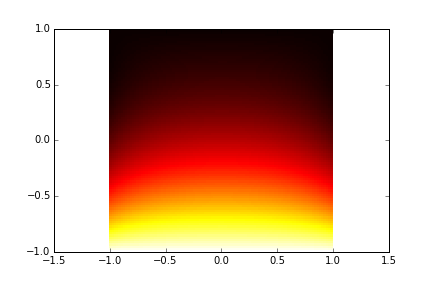
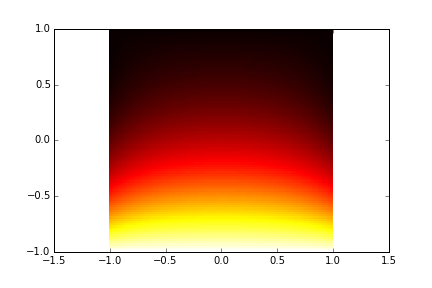
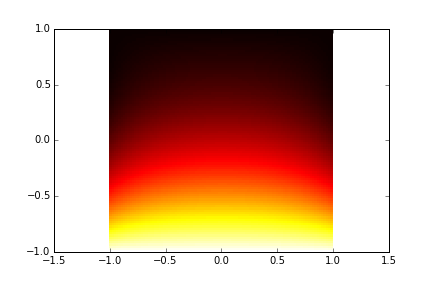
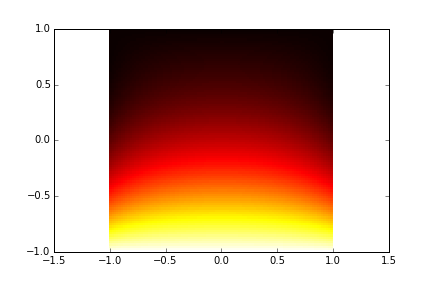
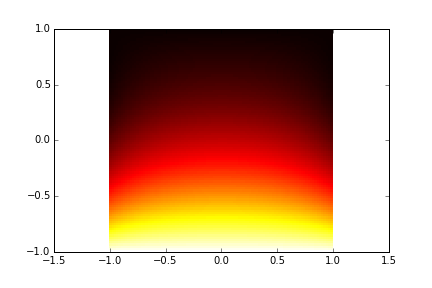
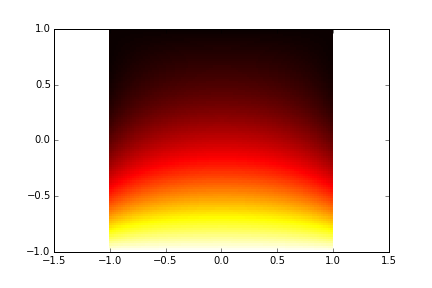
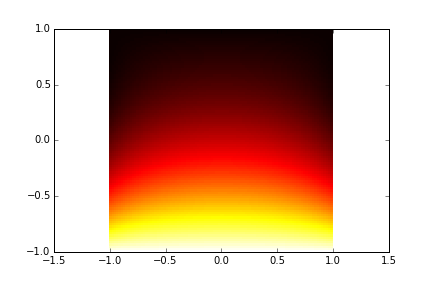
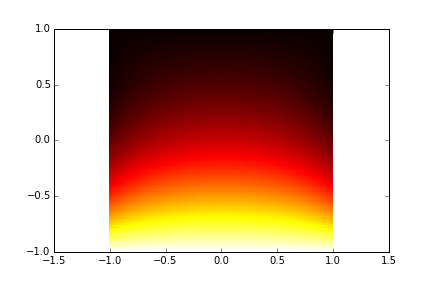
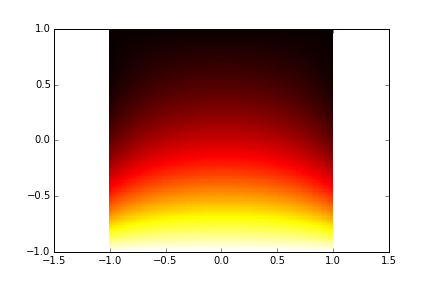
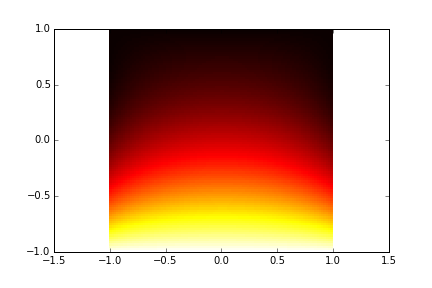
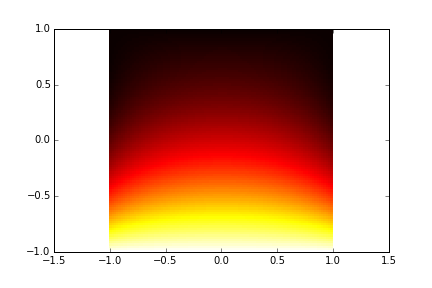
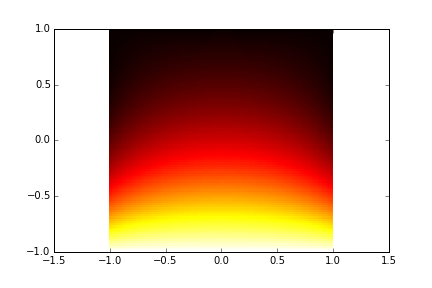
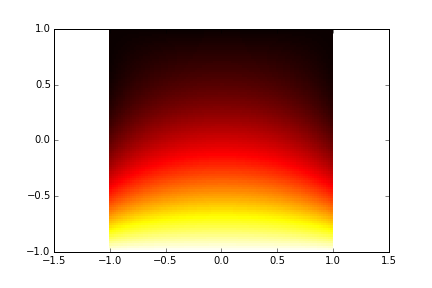
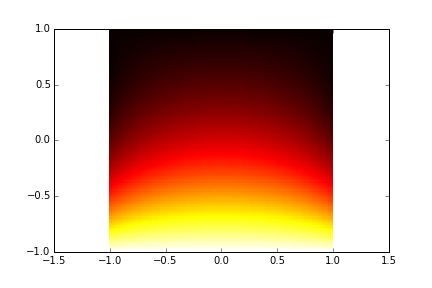
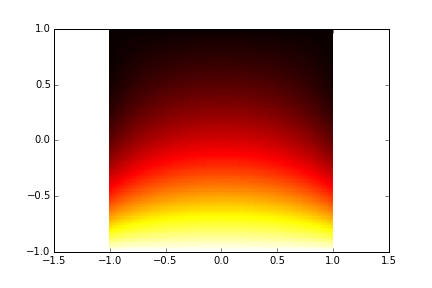
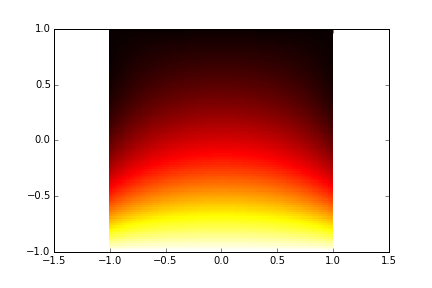
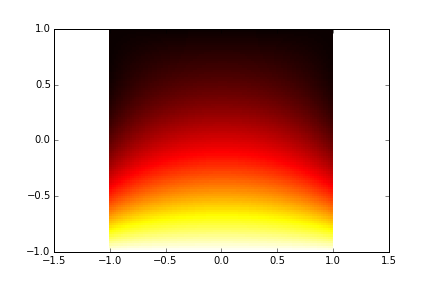
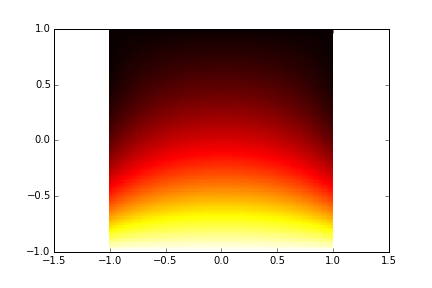
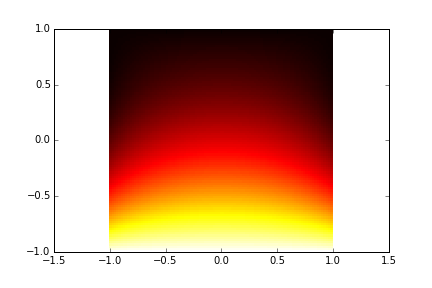
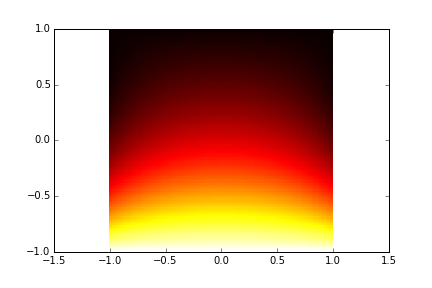
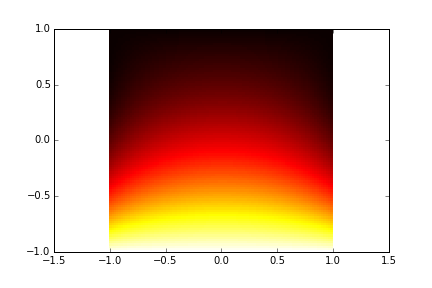
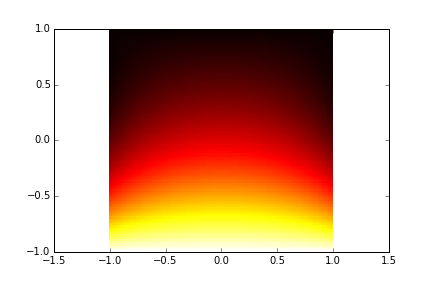
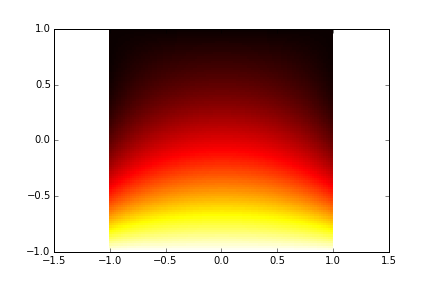
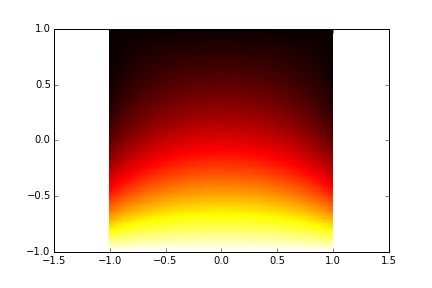
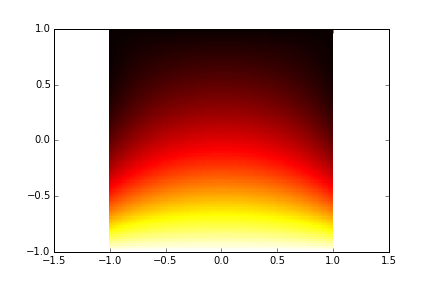
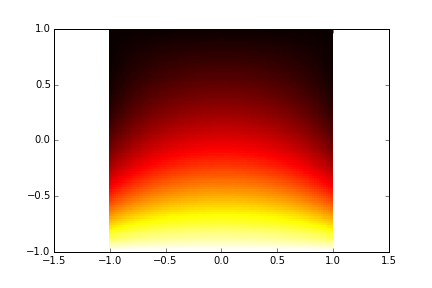
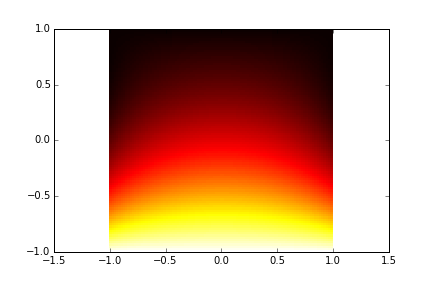
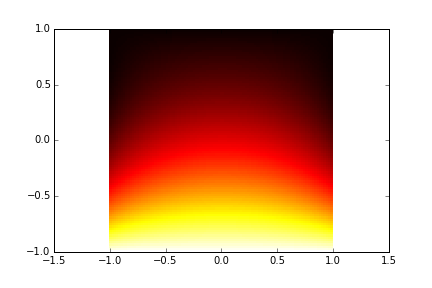
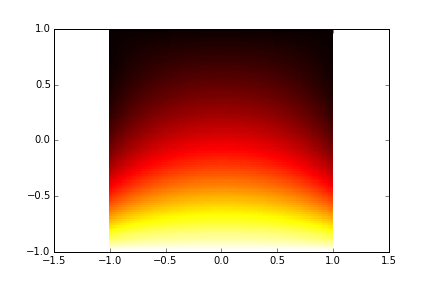
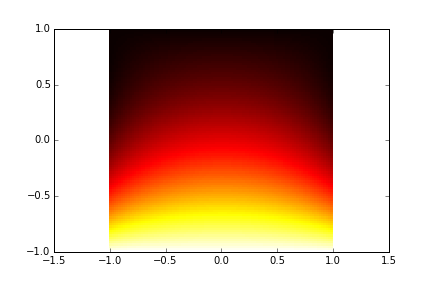
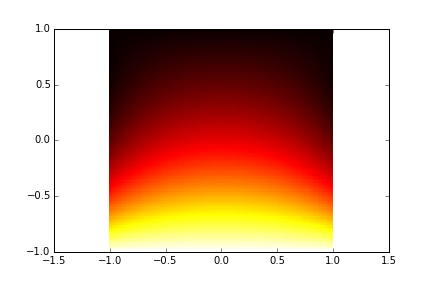
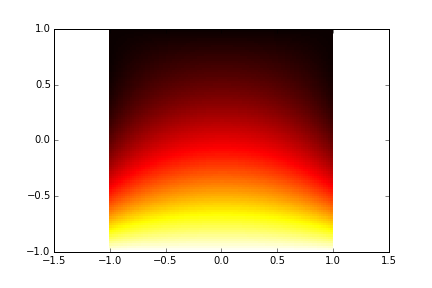
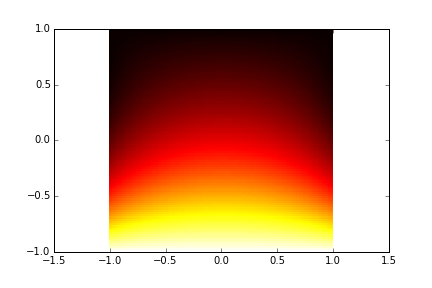
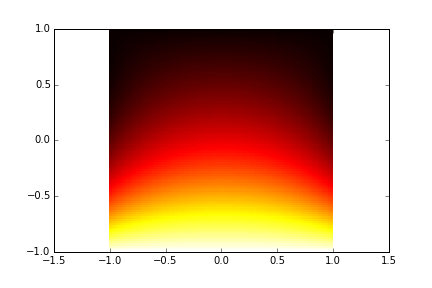
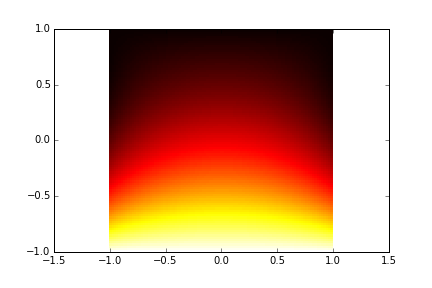
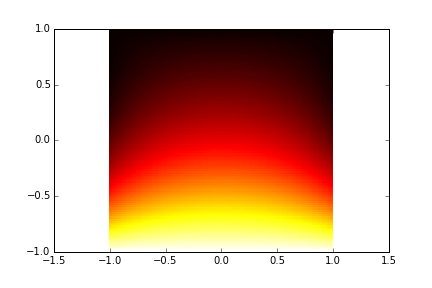
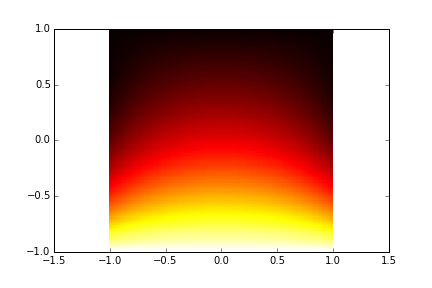
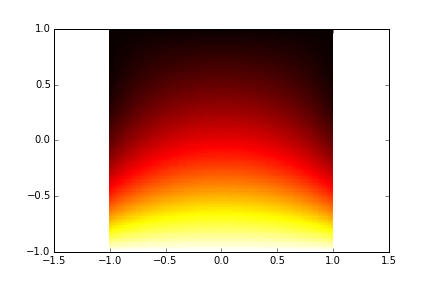
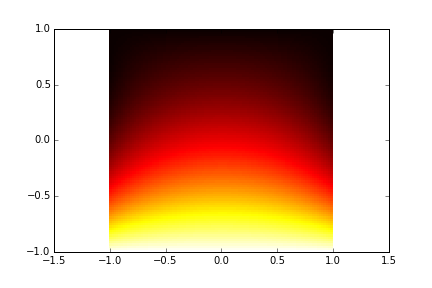
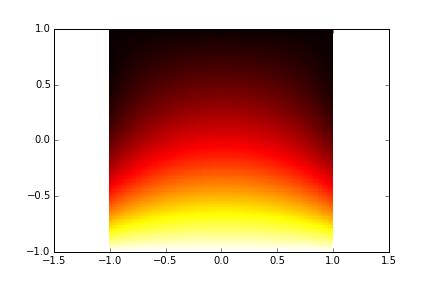
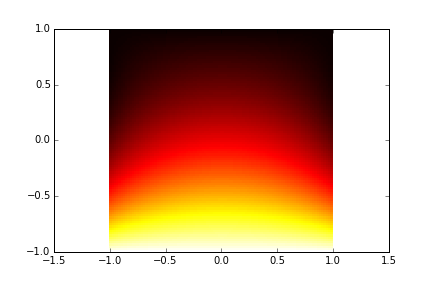
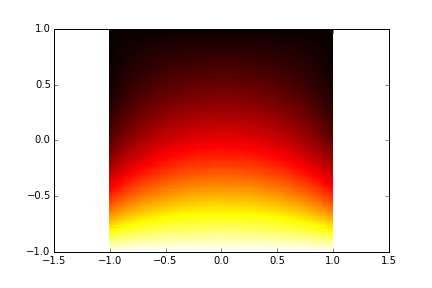
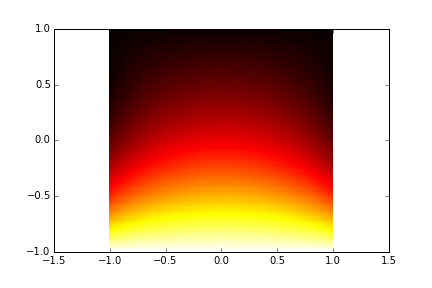
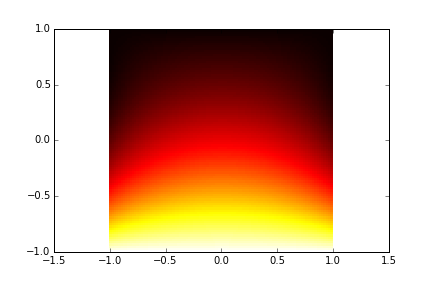
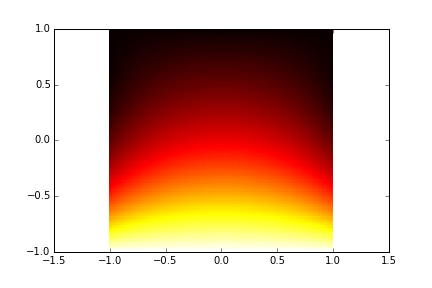
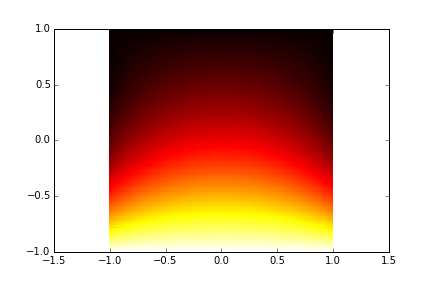
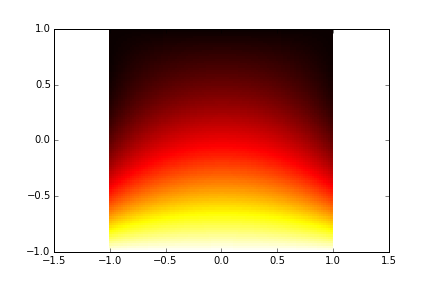
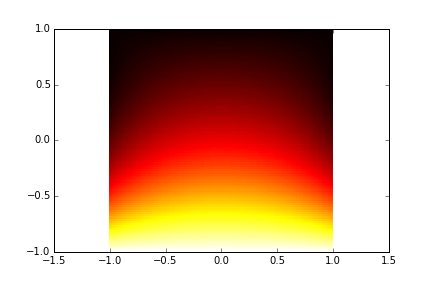
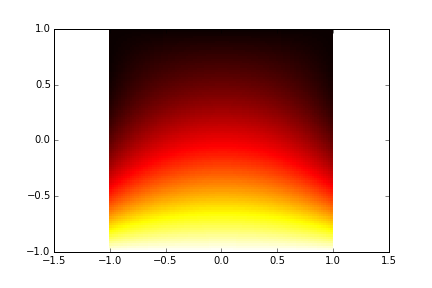
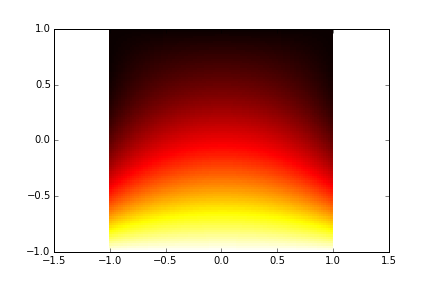
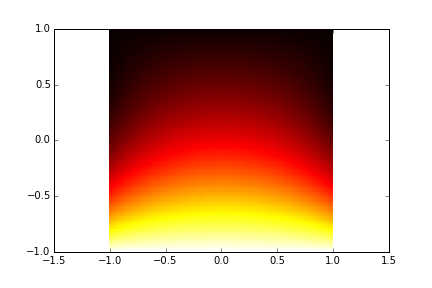
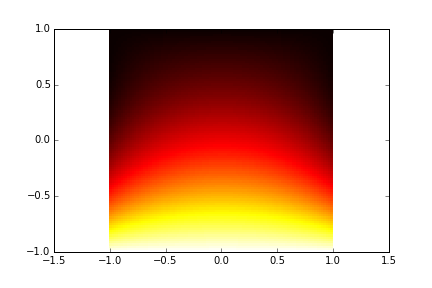
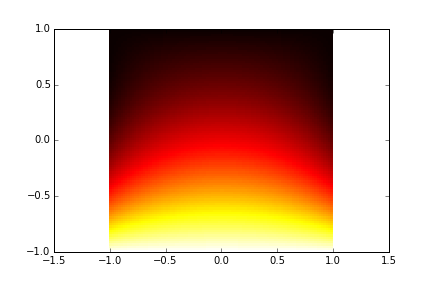
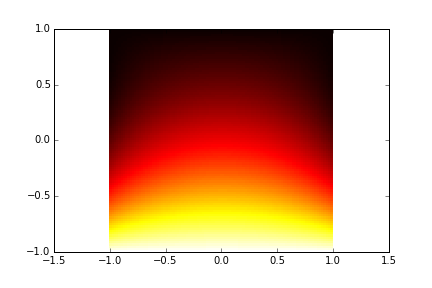
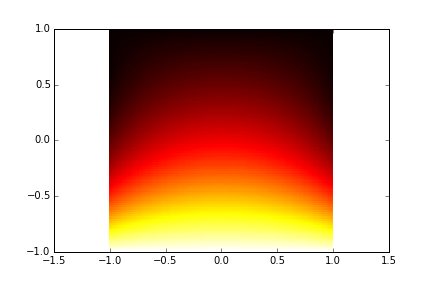
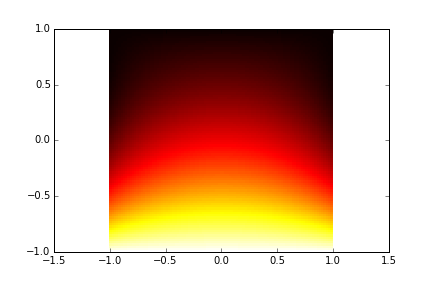
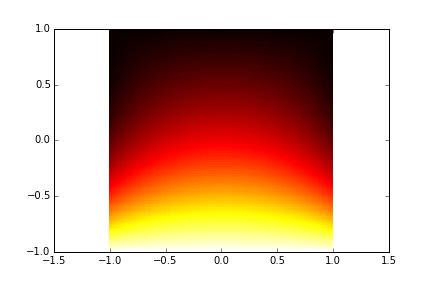
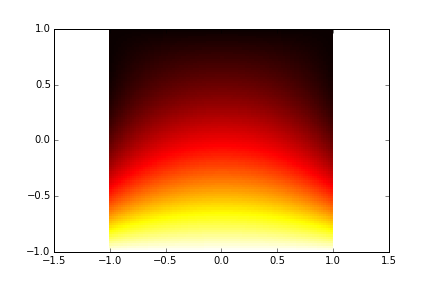
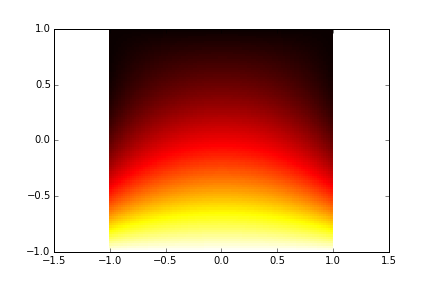
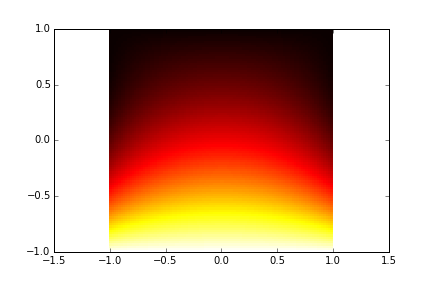
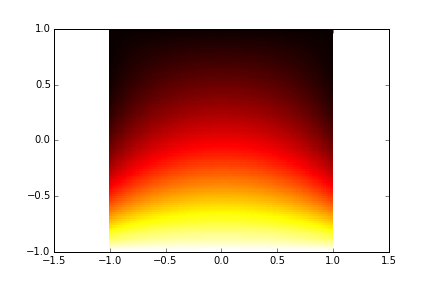
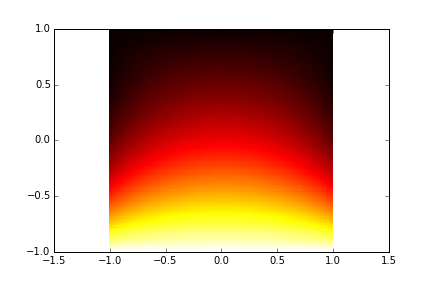
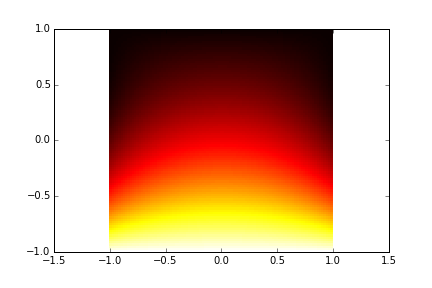

In [18]:
from matplotlib import animation
from JSAnimation import IPython_display


fig = plt.figure()
ax = plt.axes(xlim=(-1,1), ylim=(-1,1))
pc = ax.pcolormesh(x,y,u1[0,:,:],vmin=0., vmax = 1., cmap=plt.cm.hot)
plt.axis('equal')
# def init(u0):

#     pc.set_array(u0[:-1,:-1].ravel())
#     return pc

def animate(i,u0):
    pc.set_array(u1[i*100,:-1,:-1].ravel())
    return pc

animation.FuncAnimation(fig, animate, frames=100, interval=30,fargs=(u0*1.,))

In [20]:
plt.cm.hot.

In [21]:
plt.colormaps

<function matplotlib.pyplot.colormaps>

In [22]:
plt.cm.hot.

False